# 📦 Using Important Libraries
### sklearn is a machine learning library that provides easy-to-use tools for classification, regression, and clustering.
### matplotlib is used for plotting and visualizing data.
### numpy is used for numerical operations and creating meshgrids for decision boundaries.


In [96]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

# ⚙️ Function: create_model_predict(X, y)
### This function trains a Support Vector Machine (SVM) with a linear kernel on a dataset (X, y).
### It splits the data into training and testing sets, fits the model, prints the accuracy, and returns the model.


In [97]:
def create_model_predict(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    return model

# 📊 Function: plot_data_split_prediction(X, y, model)
### This function visualizes the dataset and the decision boundary of the trained SVM model.
### It creates a meshgrid across the data space and plots the decision boundary based on the model's decision function.


In [98]:
def plot_data_split_prediction(X, y, model):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Predict decision function
    try:
        Z = model.decision_function(xy).reshape(XX.shape)
    except:
        Z = model.predict_proba(xy)[:, 1].reshape(XX.shape) - 0.5

    # Debugging: check Z range
    print("Decision function range:", np.min(Z), np.max(Z))

    # Only draw if the decision boundary (Z=0) is inside the range
    if np.min(Z) < 0 < np.max(Z):
        ax.contour(XX, YY, Z, levels=[0], colors='k', linewidths=2)
    else:
        print("Warning: No decision boundary (level 0) in current plot window.")

    plt.title("SVM Decision Boundary")
    plt.show()


# 🧪 Dataset 1: make_blobs
### make_blobs generates isotropic Gaussian blobs for clustering/classification.
### Here, we generate two clusters of 2D points and try to classify them using SVM.

Accuracy: 1.0
Decision function range: -3.9033863240354734 3.617042885607254


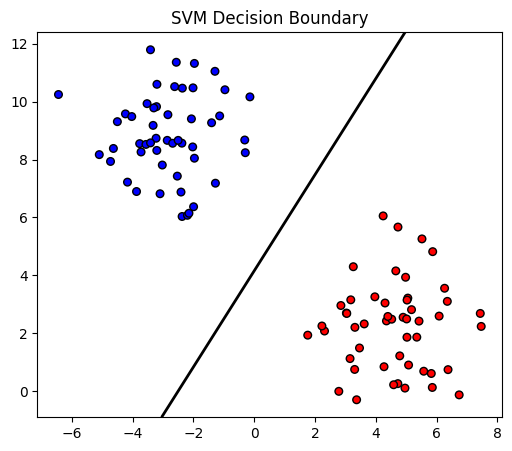

In [99]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)
model=create_model_predict(X,y)
plot_data_split_prediction(X,y,model)



# 🧪 Dataset 2: make_circles
### make_circles creates a binary classification problem with concentric circles.
### This dataset is **not linearly separable**, so a linear SVM may perform poorly.


Accuracy: 0.3333333333333333
Decision function range: 0.9995595414753778 1.000277826108912


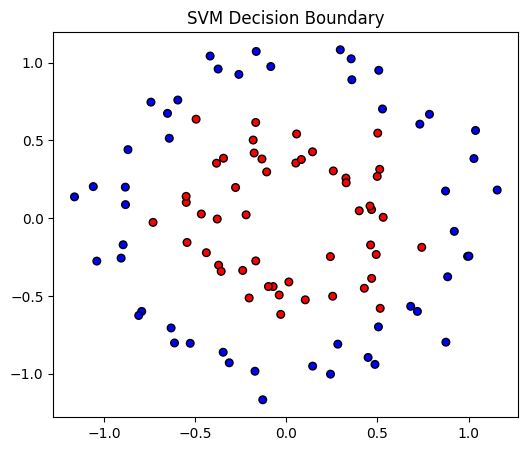

In [100]:
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
model=create_model_predict(X,y)
plot_data_split_prediction(X,y,model)



# 🧪 Dataset 3: make_moons
### make_moons generates a two-class dataset in the shape of crescent moons.
### Like `make_circles`, this dataset is also **non-linearly separable**.

Accuracy: 0.8666666666666667


Decision function range: -4.02083269497955 4.199540792949873


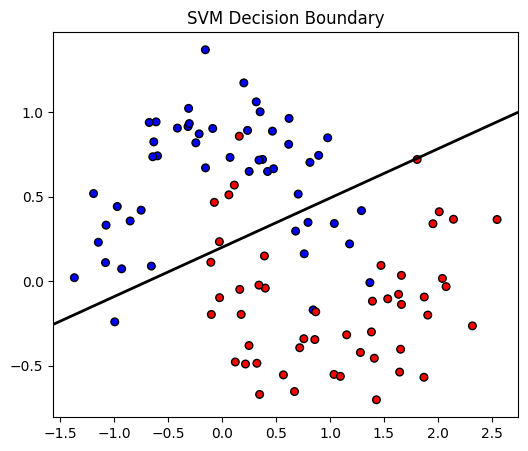

In [101]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)
model=create_model_predict(X,y)
plot_data_split_prediction(X,y,model)


## 🔧 Train Model with Specific Kernel
This function trains an `SVC` with a given kernel and returns the fitted model after printing its test accuracy.


In [102]:
def train_model_with_kernel(X,y,kernel):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model=SVC(kernel=kernel)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_pred,y_test)
    print(f"{kernel} model accuracy on Test: {accuracy}")
    return model

# 🌸 Experiment 1: IRIS Dataset (First 2 Classes & Features)
Only using:
- Features: sepal length & sepal width (columns 0, 1)
- Classes: Setosa (0) and Versicolor (1)


In [103]:
iris_df=load_iris()
X = iris_df.data
y = iris_df.target

filter=y<2
X_filtred=X[filter,:2]
y_filtred=y[filter]


linear_model=train_model_with_kernel(X_filtred,y_filtred,'linear')
poly_model=train_model_with_kernel(X_filtred,y_filtred,'poly')
rbf_model=train_model_with_kernel(X_filtred,y_filtred,'rbf')

linear model accuracy on Test: 1.0
poly model accuracy on Test: 1.0
rbf model accuracy on Test: 1.0


### 📊 Plot Decision Boundaries (Iris Dataset)


Decision function range: -5.787590361845776 6.676107214996133


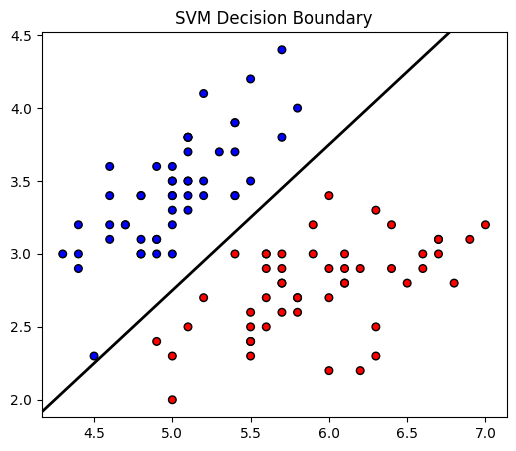

In [104]:
plot_data_split_prediction(X_filtred,y_filtred,linear_model)

Decision function range: -14.926078330777106 27.532515546232442


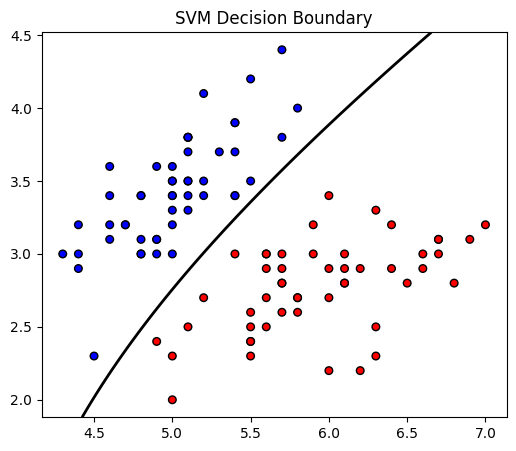

In [105]:
plot_data_split_prediction(X_filtred,y_filtred,poly_model)

Decision function range: -2.1262966230933995 2.098793660882479


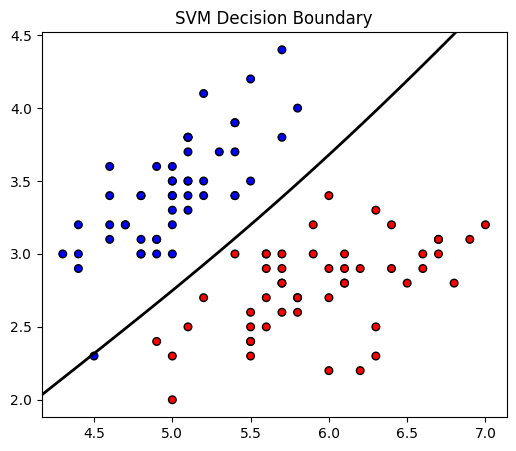

In [106]:
plot_data_split_prediction(X_filtred,y_filtred,rbf_model)

# 🧬 Experiment 2: Breast Cancer Dataset (Features 4 & 5 only)
Using:
- Features: mean smoothness & mean compactness


In [ ]:
data=load_breast_cancer()
X=data.data[:,4:6]
y=data.target

linear_model=train_model_with_kernel(X,y,'linear')
poly_model=train_model_with_kernel(X,y,'poly')
rbf_model=train_model_with_kernel(X,y,'rbf')

### 📊 Plot Decision Boundaries (Breast Cancer Dataset)


Decision function range: -0.8793102279929523 1.4239222124170487


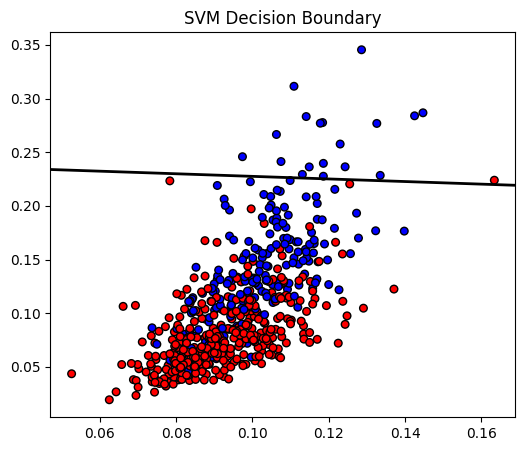

In [109]:
plot_data_split_prediction(X,y,linear_model)

Decision function range: -12.685240932493482 25.24012859893796


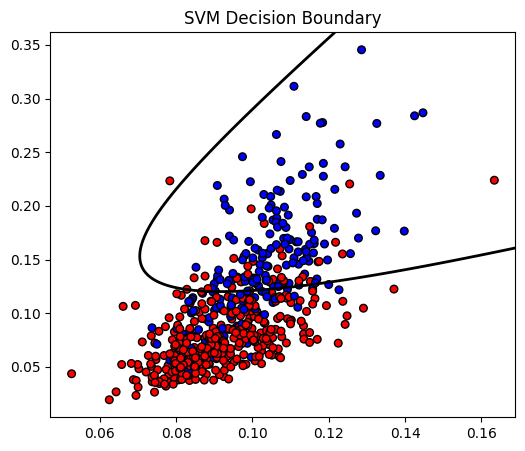

In [110]:
plot_data_split_prediction(X,y,poly_model)

Decision function range: -1.1911151146281147 1.3945294382352846


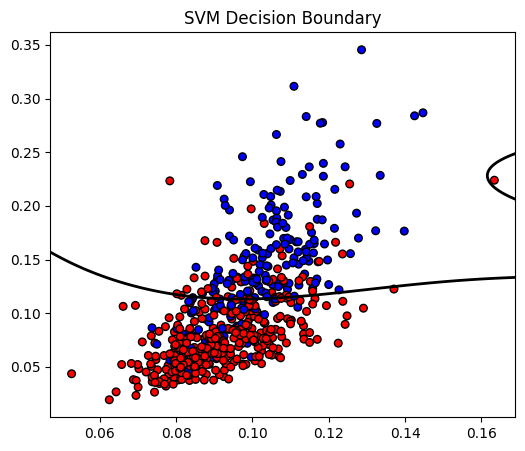

In [111]:
plot_data_split_prediction(X,y,rbf_model)